In [172]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import scipy.integrate as integrate

In [173]:
H_0=67
om_r=4.1511*10**(-5)/(0.67)**2
print(om_r)
c=8*10**5

9.24727110715081e-05


In [174]:
def om_k(om_m,om_lamb):
    result= 1-om_m-om_lamb-om_r
    return result
def E(om_m,om_lamb,x):
    result=np.sqrt(om_m*(1+x)**3+om_lamb+om_r*(1+x)**3+om_k(om_m,om_lamb)*(1+x)**2)
    return result
def integral(om_m,om_lamb,z): 
    result=integrate.quad(lambda x: 1/E(om_m,om_lamb,x), 0, z)
    return result[0]

In [175]:
def f1(om_m,om_lamb,z):
    result=c/(H_0*np.sqrt(om_k(om_m,om_lamb)))*np.sinh(np.sqrt(om_k(om_m,om_lamb))*integral(om_m,om_lamb,z))
    return result
def f2(om_m,om_lamb,z):
    result=c/H_0*integral(om_m,om_lamb,z)
    return result
def f3(om_m,om_lamb,z):
    result=c/(H_0*np.sqrt(-om_k(om_m,om_lamb)))*np.sin(np.sqrt(-om_k(om_m,om_lamb))*integral(om_m,om_lamb,z))
    return result

In [176]:
z=1000

In [188]:
N=5
x_m=np.linspace(0,1,N)
y_lamb=np.linspace(0,1,N)
X_m,Y_lambda=np.meshgrid(x_m,y_lamb)
result_array=np.zeros((N,N))

In [178]:
for i in range(N):
    for j in range(N):
        om=X_m[i][j]
        ol=Y_lambda[i][j]
        if om_k(om,ol)>0:
            result_array[i][j]=f1(om,ol,z)
        if om_k(om,ol)==0:
            result_array[i][j]=f2(om,ol,z)
        if om_k(om,ol)<0:
            result_array[i][j]=f3(om,ol,z)
print(result_array)

[[5715060.39797339 1984325.34313101 1273202.66242476 ...   23347.42799625
    23235.04776364   23123.76552968]
 [5721010.98367943 1980901.75733999 1270353.93328912 ...   23285.49003386
    23173.45768787   23062.51980434]
 [5726982.85558805 1977455.42235133 1267491.16199618 ...   23223.49735315
    23111.81335031   23001.22026798]
 ...
 [2646728.00547739  197355.87817845  135238.90926494 ...    9978.63128682
     9945.02988616    9911.69491343]
 [1802601.46775015  171481.13382461  122425.80110011 ...    9904.31918382
     9871.17678197    9838.29577746]
 [ 624234.32960599  145152.74192381  109467.42198108 ...    9829.93995032
     9797.2571776     9764.83076281]]


Text(0, 0.5, '$\\Omega_{\\Lambda}$')

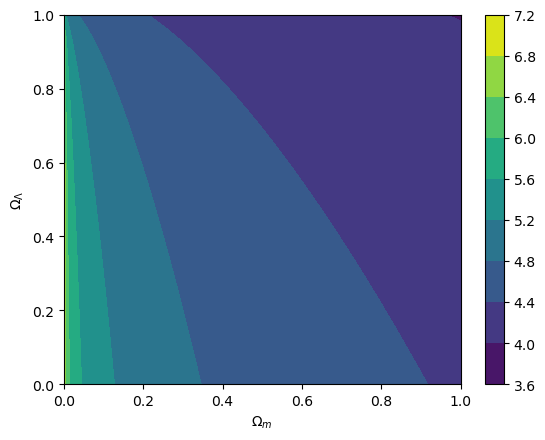

In [183]:
plt.contourf(x_m,y_lamb,np.log10(result_array))
plt.colorbar()
plt.xlabel('$\Omega_m$')
plt.ylabel('$\Omega_{\Lambda}$')